In [2]:
import psycopg2
conn = psycopg2.connect(user = "postgre",
                        password = "postgre",
                        host = "127.0.0.1",
                        port = "5432",
                        database = "postgres_db")

In [10]:
import pandas as pd
import datetime as dt

# SQL запрос
query="SELECT * FROM ratings_task2"
ratings=pd.read_sql_query(query,conn)

# events = pd.read_csv('credit_events_task.csv', sep = ';')
# ratings = pd.read_csv('name.csv')
rat = ratings[ratings['agency_id'] == 'EXP']
rat = rat[['grade', 'inn', 'date']]
rat['grade'] = pd.Categorical(rat['grade'], ['A++', 'A++.mfi', 'A+', 'A+.mfi', 'A', 'A.mfi',
                                             'BBB+', 'BBB', 'BBB-','BB+', 'BB', 'B++', 'B++.mfi', 'B+', 'B+.mfi', 'B', 'B-', 
                                             'C++', 'C++.mfi', 'C+', 'C', 'D', 'E', 'Приостановлен', 'Снят'])

type(rat.loc[1,'date'])
rat['date'] = pd.to_datetime(rat['date'])
type(rat.loc[1,'date'])
# rat = rat[(rat['date'] > dt.datetime(2000, 1, 1)) & (rat['date'] < dt.datetime(2008, 1, 1))]

pivot = rat.pivot_table(index = 'inn', columns = 'grade', aggfunc = 'min')
pivot_1 = pd.DataFrame(index = pivot.index)

a = pivot['date'].columns.values
a
for i in range(0, len(a)):
    pivot_1[a[i]] = pivot['date'].iloc[:, i]
pivot_1

pivot = rat.pivot_table(index = 'inn', columns = 'grade', aggfunc = 'max')
pivot
# pivot_2 = pd.DataFrame(index = pivot.index)

for i in range(0, len(a)):
    pivot_1[a[i] + '_last_date'] = pivot['date'].iloc[:, i]
pivot_1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,A++,A++.mfi,A+,A+.mfi,A,A.mfi,BBB+,BBB,BBB-,BB+,...,B_last_date,B-_last_date,C++_last_date,C++.mfi_last_date,C+_last_date,C_last_date,D_last_date,E_last_date,Приостановлен_last_date,Снят_last_date
inn,,,,,,,,,,,,,,,,,,,,,
1.000000e+08,NaT,NaT,NaT,NaT,2013-01-28,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2014-01-31
1.000000e+08,NaT,NaT,NaT,NaT,2012-08-02,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-10-20
1.030019e+08,NaT,NaT,NaT,NaT,2012-12-26,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1.060005e+08,NaT,NaT,2014-11-06,NaT,2012-10-31,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2.660083e+08,NaT,NaT,2013-01-31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2.729016e+08,NaT,NaT,2015-12-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2.740612e+08,NaT,NaT,NaT,NaT,2010-10-08,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,2014-04-02,NaT,NaT,NaT,2014-04-17
2.750667e+08,NaT,NaT,NaT,2015-12-09,NaT,2013-12-16,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2.760164e+08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,2010-07-21,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2010-05-24,NaT


In [11]:
defs_E = {}
defs_D = {}
non_defs = {}

table = pd.DataFrame(index = a)
table['D'] = 0
table['E'] = 0

for i in a:
    tab = pivot_1[[i, 'D_last_date']]
    tab = tab.dropna()
    defs_D.update({i:len(tab)})
    non_defs.update({i:len(pivot_1[[i]])})

for i in a:
    tab = pivot_1[[i, 'E_last_date']]
    tab = tab.dropna()
    defs_E.update({i:len(tab)})

defs_D
table['D'] = pd.Series(defs_D)
table['E'] = pd.Series(defs_E)
table['All'] = pd.Series(non_defs)
table['default'] = table['D'] + table['E']
table['non-default'] = table['All'] - table['default']
table = table[['default', 'non-default']]
table
# table = pivot_1[['A', 'D_last_date', 'E_last_date']]
# table

,default,non-default
A++,1,1038
A++.mfi,0,1039
A+,4,1035
A+.mfi,0,1039
A,30,1009
A.mfi,0,1039
BBB+,0,1039
BBB,0,1039
BBB-,0,1039
BB+,0,1039


### График из задания 3

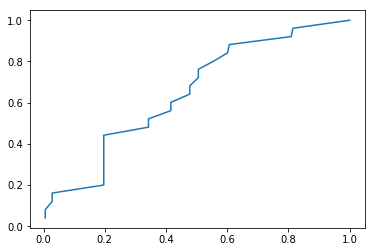

In [12]:
roc_table = pd.DataFrame(index = table.index)
roc_table['default_cumsum'] = table['default'].cumsum() / table['default'].sum()
roc_table['non-default_cumsum'] = table['non-default'].cumsum() / table['non-default'].sum()
roc_table

# правда теперь он получился как на картинке из учебника
import matplotlib.pyplot as plt
plt.plot(roc_table['default_cumsum'].values, roc_table['non-default_cumsum'].values)
plt.show()

## Домашняя работа 4

In [13]:
import os

### Экспорт таблицы

In [14]:
export = input("Input 'y' if you want to export table containing last dates "
               "of ratings by agency EXP as csv file, else input 'n'")
if export == 'y':
    table_name = "EXP_ratings_last_date"
    pathfile = input("Input directory path and, if you want, filename.\n"
                     "Use | to divide them. Don't write extension\n"
                     "Example: .|table"
                     "If filename is not provided, {}.csv will be used".format(table_name))
    # разобьём по разделителю, он выбран таким, потому что не может попасться в имени папок и файлов
    path_filename = pathfile.split('|')
    # если в разбиении одна подстрока, то пользователь не указал имя
    if len(path_filename) == 1:
        path = path_filename[0] + os.sep + table_name + '.csv'
    elif len(path_filename) == 2:
        path = path_filename[0] + os.sep + path_filename[1] + '.csv'
    else: 
        raise ValueError("Incorrect input")
    pivot.to_csv(path)
    print("Successfully exported as {}".format(path))

Input 'y' if you want to export table containing last dates of ratings by agency EXP as csv file, else input 'n'y
Input directory path and, if you want, filename.
Use | to divide them. Don't write extension
Example: .|tableIf filename is not provided, EXP_ratings_last_date.csv will be used.
Successfully exported as .\EXP_ratings_last_date.csv


### Экспорт графика

In [19]:
export = input("Input 'y' if you want to export roc plot for ratings "
               "as png file, else input 'n'")
if export == 'y':
    plot_name = "ROC_ratings_plot"
    pathfile = input("Input directory path and, if you want, filename.\n"
                     "Use | to divide them. Don't write extension\n"
                     "Example: .|plot\n"
                     "If filename is not provided, {}.csv will be used".format(plot_name))
    # разобьём по разделителю, он выбран таким, потому что не может попасться в имени папок и файлов
    path_filename = pathfile.split('|')
    # если в разбиении одна подстрока, то пользователь не указал имя
    if len(path_filename) == 1:
        path = path_filename[0] + os.sep + plot_name + '.png'
    elif len(path_filename) == 2:
        path = path_filename[0] + os.sep + path_filename[1] + '.png'
    else: 
        raise ValueError("Incorrect input")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(roc_table['default_cumsum'].values, roc_table['non-default_cumsum'].values)
    plt.savefig(path)
    plt.close()
    print("Successfully exported as {}".format(path))

Input 'y' if you want to export roc plot for ratings as png file, else input 'n'y
Input directory path and, if you want, filename.
Use | to divide them. Don't write extension
Example: .|plot
If filename is not provided, ROC_ratings_plot.csv will be used.
Successfully exported as .\ROC_ratings_plot.png


### Отчёт

Для работы с русским шрифтом необходимо скачать файл отсюда (кнопка Download) и разместить в папке проекта
https://github.com/opensourcedesign/fonts/blob/master/gnu-freefont_freesans/FreeSans.ttf

In [20]:
from fpdf import FPDF

In [21]:
report_name = "report_ratings_count_and_ROC"
pathfile = input("Input directory path and, if you want, filename.\n"
                 "Use | to divide them. Don't write extension\n"
                 "Example: .|report\n"
                 "If filename is not provided, {}.pdf will be used\n".format(report_name))
# разобьём по разделителю, он выбран таким, потому что не может попасться в имени папок и файлов
path_filename = pathfile.split('|')
# если в разбиении одна подстрока, то пользователь не указал имя
if len(path_filename) == 1:
    path = path_filename[0] + os.sep + report_name + '.pdf'
elif len(path_filename) == 2:
    path = path_filename[0] + os.sep + path_filename[1] + '.pdf'
else: 
    raise ValueError("Incorrect input")

Input directory path and, if you want, filename.
Use | to divide them. Don't write extension
Example: .|report
If filename is not provided, report_ratings_count_and_ROC.pdf will be used
.


In [22]:
# создадим объект FPDF
pdf = FPDF()
pdf.add_page()
pdf.add_font('FreeSans', '', './FreeSans.ttf', uni=True)
pdf.set_font("FreeSans")
# текст
pdf.cell(200, 10, txt="Отчёт: составлен Речмединой Светланой Александровной", ln=1, align="C")
pdf.cell(150, 5, "Данный отчёт содержит таблицу с количествами каждого значения рейтинга ", ln=1, align="L")
pdf.cell(50, 5, "и график, на котором изображена ROC-кривая для этих количеств.", ln=1, align="L")
pdf.cell(50, 5, "", ln=1, align="L")
# таблица
data = [list(table.columns)] + [list(val) for val in table.values]
col_width = pdf.w / 4.5
row_height = pdf.font_size
spacing = 1.5
for row in data:
    for item in row:
        pdf.cell(col_width, row_height*spacing, txt=str(item), border=1)
    pdf.ln(row_height*spacing)
pdf.cell(col_width, 12, txt="В таблице представлены количества появлений рейтингов")
# график
plot_name = "temp.png"
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
_ = plt.plot(roc_table['default_cumsum'].values, roc_table['non-default_cumsum'].values)
_ = plt.savefig(plot_name)
plt.close()
pdf.add_page()
pdf.image(plot_name, x=10, y=0, w=100)
pdf.cell(200, 120, txt="На графике изображена ROC-кривая для количества появлений каждого значения рейтинга", ln=1)
_ = pdf.output(path)
# удалим файл с графиком, чтобы не оставлять то, чего у нас не просили
os.remove(plot_name)